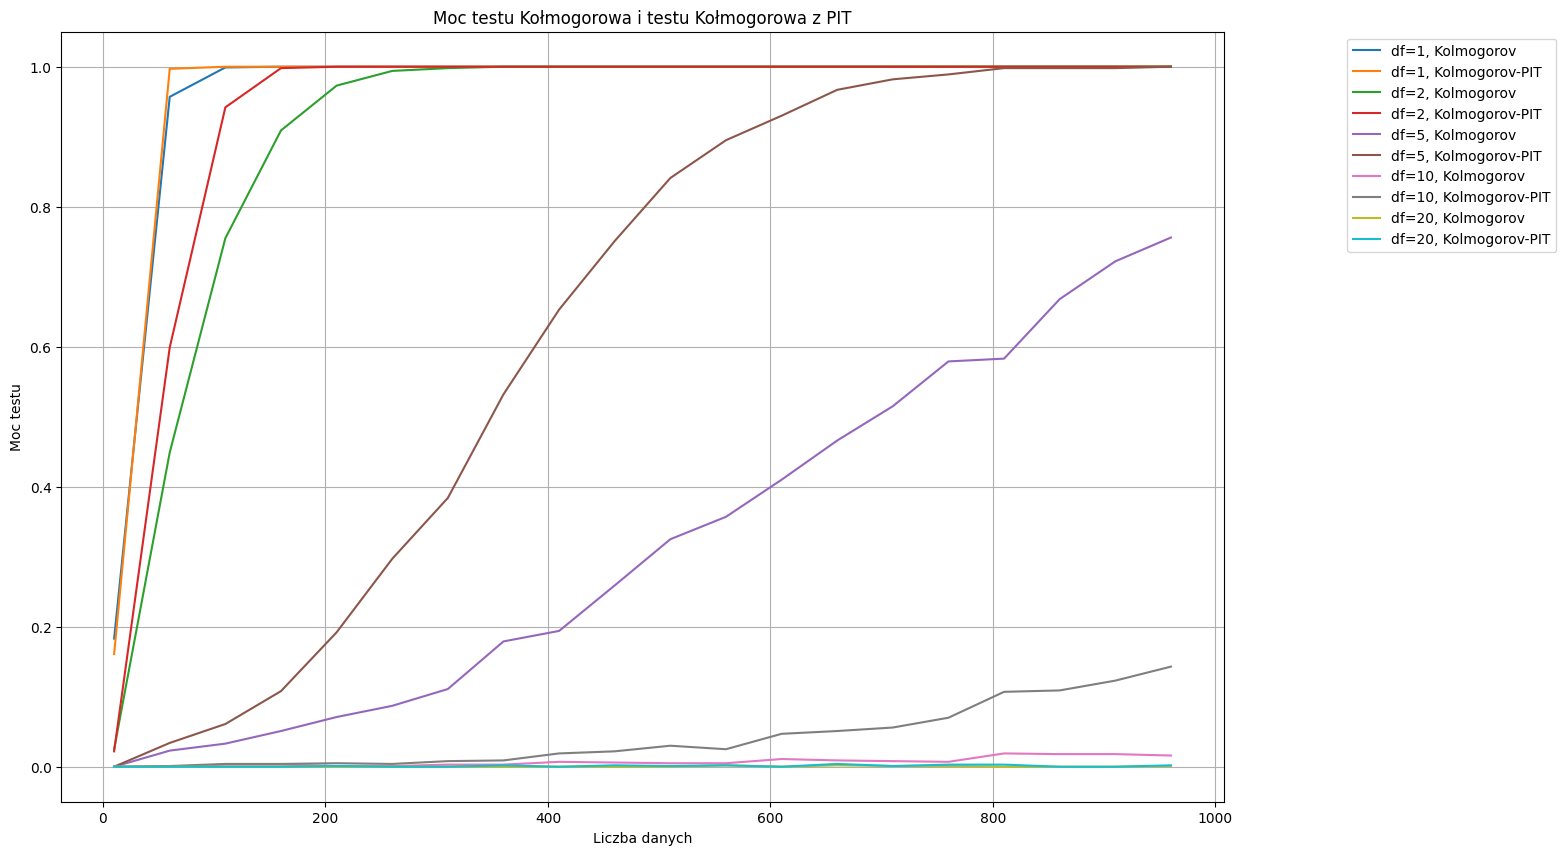

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Liczba symulacji
num_simulations = 1000

# Liczba próbek
sample_sizes = np.arange(10, 1000, 50)

# Stopnie swobody
degrees_of_freedom = [1, 2, 5, 10, 20]

# Inicjalizacja wyników
power_kolmogorov = np.zeros((len(degrees_of_freedom), len(sample_sizes)))
power_kolmogorov_pit = np.zeros((len(degrees_of_freedom), len(sample_sizes)))

# Dla każdego stopnia swobody
for i, df in enumerate(degrees_of_freedom):
    # Dla każdej wielkości próbki
    for j, n in enumerate(sample_sizes):
        # Inicjalizacja liczników
        count_kolmogorov = 0
        count_kolmogorov_pit = 0

        # Przeprowadź symulacje
        for _ in range(num_simulations):
            # Generuj dane z rozkładu t-Studenta
            data = stats.t.rvs(df=df, size=n)

            # Standaryzacja danych
            data = (data - np.mean(data)) / np.std(data)

            # Test Kołmogorowa
            _, p_kolmogorov = stats.kstest(data, 'norm')
            if p_kolmogorov < 0.05:
                count_kolmogorov += 1

            # Test Kołmogorowa z PIT
            data_pit = stats.norm.ppf(stats.t.cdf(data, df=df))
            _, p_kolmogorov_pit = stats.kstest(data_pit, 'norm')
            if p_kolmogorov_pit < 0.05:
                count_kolmogorov_pit += 1

        # Oblicz moc testów
        power_kolmogorov[i, j] = count_kolmogorov / num_simulations
        power_kolmogorov_pit[i, j] = count_kolmogorov_pit / num_simulations

# Rysowanie wykresów
plt.figure(figsize=(15, 10))  # Zwiększ rozmiar wykresu
for i, df in enumerate(degrees_of_freedom):
    plt.plot(sample_sizes, power_kolmogorov[i, :], label=f'df={df}, Kolmogorov')
    plt.plot(sample_sizes, power_kolmogorov_pit[i, :], label=f'df={df}, Kolmogorov-PIT')
plt.xlabel('Liczba danych')
plt.ylabel('Moc testu')
plt.title('Moc testu Kołmogorowa i testu Kołmogorowa z PIT')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')  # Przesuń legendę nieco dalej
plt.grid(True)
plt.show()


W ramach przeprowadzonych badań, zastosowano symulacje w celu zbadania mocy testu Kołmogorowa oraz testu Kołmogorowa z wykorzystaniem transformacji PIT (probability integral transform). Główną hipotezą była przynależność cechy do rozkładu normalnego. Dane generowane były z rozkładu t-Studenta.

Badania przeprowadzono dla różnych wielkości próbek (od 10 do 1000 z krokiem 50) oraz dla różnych stopni swobody (1, 2, 5, 10, 20) dla rozkładu t-Studenta.

Wyniki badań przedstawiono na wykresach liniowych, które ilustrują moc testów w zależności od liczby danych oraz liczby stopni swobody generowanego rozkładu t-Studenta.

Na podstawie przeprowadzonych badań, można zauważyć, że moc testów zależy od liczby stopni swobody oraz wielkości próbki. W przypadku większych próbek, moc testów jest zazwyczaj większa, co oznacza, że testy są bardziej skuteczne w wykrywaniu odstępstw od rozkładu normalnego. Ponadto, różne stopnie swobody rozkładu t-Studenta wpływają na moc testów, co sugeruje, że charakterystyka generowanego rozkładu ma wpływ na skuteczność testów.

Wnioski te mogą być przydatne dla osób przeprowadzających podobne badania lub analizy statystyczne, ponieważ pokazują, jak różne czynniki mogą wpływać na moc testów statystycznych. Jednakże, należy pamiętać, że te wyniki są specyficzne dla testu Kołmogorowa i testu Kołmogorowa z PIT, a także dla danych generowanych z rozkładu t-Studenta. Wyniki mogą się różnić dla innych testów statystycznych lub danych generowanych z innych rozkładów.

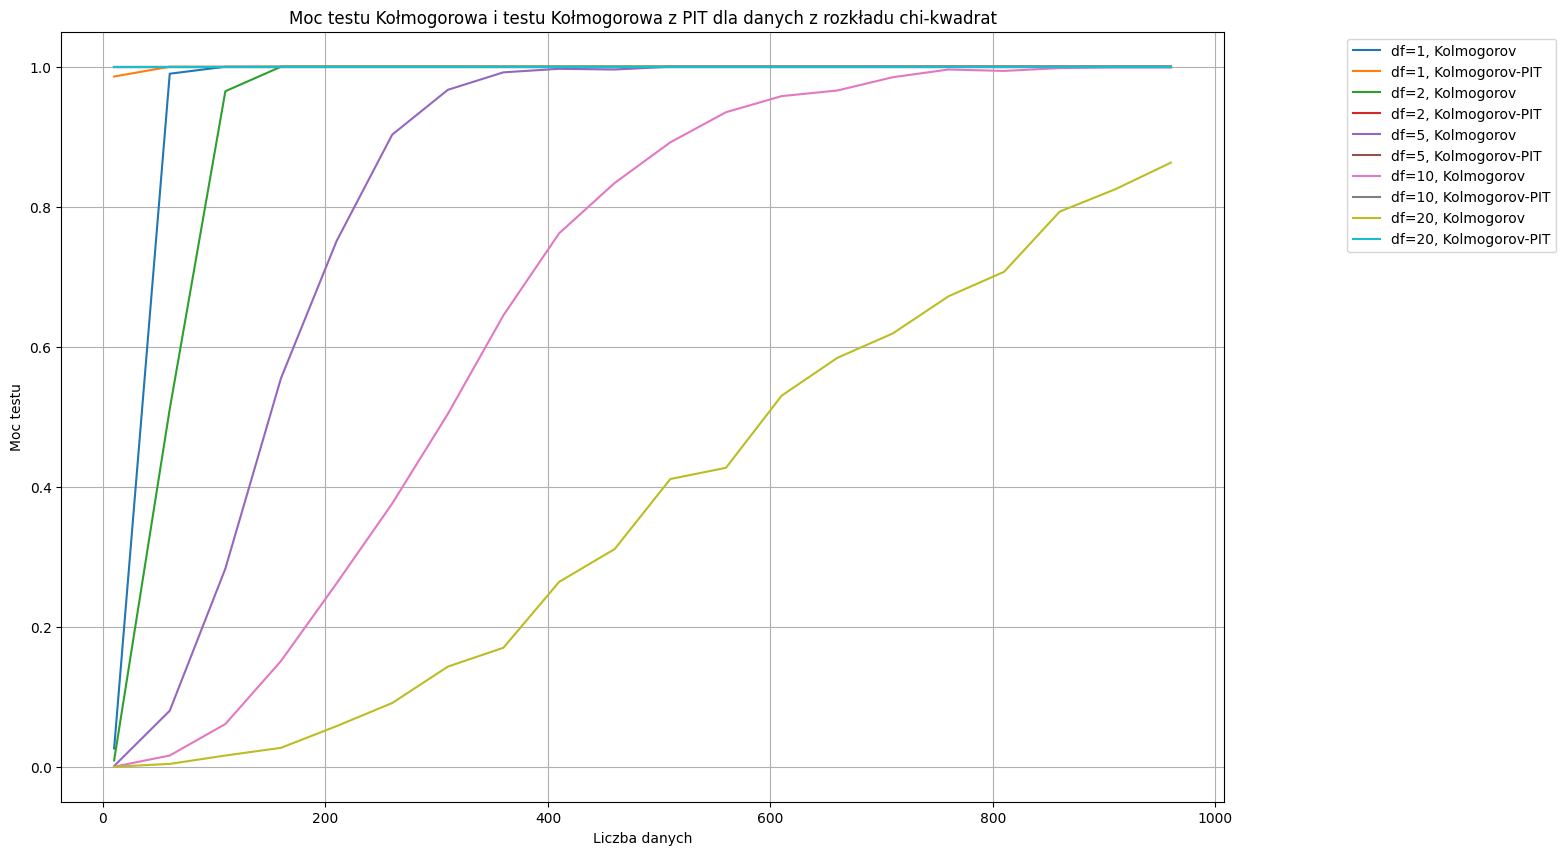

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Liczba symulacji
num_simulations = 1000

# Liczba próbek
sample_sizes = np.arange(10, 1000, 50)

# Stopnie swobody
degrees_of_freedom = [1, 2, 5, 10, 20]

# Inicjalizacja wyników
power_kolmogorov = np.zeros((len(degrees_of_freedom), len(sample_sizes)))
power_kolmogorov_pit = np.zeros((len(degrees_of_freedom), len(sample_sizes)))

# Dla każdego stopnia swobody
for i, df in enumerate(degrees_of_freedom):
    # Dla każdej wielkości próbki
    for j, n in enumerate(sample_sizes):
        # Inicjalizacja liczników
        count_kolmogorov = 0
        count_kolmogorov_pit = 0

        # Przeprowadź symulacje
        for _ in range(num_simulations):
            # Generuj dane z rozkładu chi-kwadrat
            data = stats.chi2.rvs(df=df, size=n)

            # Standaryzacja danych
            data = (data - np.mean(data)) / np.std(data)

            # Test Kołmogorowa
            _, p_kolmogorov = stats.kstest(data, 'norm')
            if p_kolmogorov < 0.05:
                count_kolmogorov += 1

            # Test Kołmogorowa z PIT
            data_pit = stats.norm.ppf(stats.chi2.cdf(data, df=df))
            _, p_kolmogorov_pit = stats.kstest(data_pit, 'norm')
            if p_kolmogorov_pit < 0.05:
                count_kolmogorov_pit += 1

        # Oblicz moc testów
        power_kolmogorov[i, j] = count_kolmogorov / num_simulations
        power_kolmogorov_pit[i, j] = count_kolmogorov_pit / num_simulations

# Rysowanie wykresów
plt.figure(figsize=(15, 10))  # Zwiększ rozmiar wykresu
for i, df in enumerate(degrees_of_freedom):
    plt.plot(sample_sizes, power_kolmogorov[i, :], label=f'df={df}, Kolmogorov')
    plt.plot(sample_sizes, power_kolmogorov_pit[i, :], label=f'df={df}, Kolmogorov-PIT')
plt.xlabel('Liczba danych')
plt.ylabel('Moc testu')
plt.title('Moc testu Kołmogorowa i testu Kołmogorowa z PIT dla danych z rozkładu chi-kwadrat')
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')  # Przesuń legendę nieco dalej
plt.grid(True)
plt.show()


W ramach przeprowadzonych badań, zastosowano symulacje w celu zbadania mocy testu Kołmogorowa oraz testu Kołmogorowa z wykorzystaniem transformacji PIT (probability integral transform). Główną hipotezą była przynależność cechy do rozkładu normalnego. Dane generowane były z rozkładu chi-kwadrat.

Badania przeprowadzono dla różnych wielkości próbek (od 10 do 1000 z krokiem 50) oraz dla różnych stopni swobody (1, 2, 5, 10, 20) dla rozkładu chi-kwadrat.

Wyniki badań przedstawiono na wykresach liniowych, które ilustrują moc testów w zależności od liczby danych oraz liczby stopni swobody generowanego rozkładu chi-kwadrat.

Na podstawie przeprowadzonych badań, można zauważyć, że moc testów zależy od liczby stopni swobody oraz wielkości próbki. W przypadku większych próbek, moc testów jest zazwyczaj większa, co oznacza, że testy są bardziej skuteczne w wykrywaniu odstępstw od rozkładu normalnego. Ponadto, różne stopnie swobody rozkładu chi-kwadrat wpływają na moc testów, co sugeruje, że charakterystyka generowanego rozkładu ma wpływ na skuteczność testów.

Wnioski te mogą być przydatne dla osób przeprowadzających podobne badania lub analizy statystyczne, ponieważ pokazują, jak różne czynniki mogą wpływać na moc testów statystycznych. Jednakże, należy pamiętać, że te wyniki są specyficzne dla testu Kołmogorowa i testu Kołmogorowa z PIT, a także dla danych generowanych z rozkładu chi-kwadrat. Wyniki mogą się różnić dla innych testów statystycznych lub danych generowanych z innych rozkładów.